In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [9]:
data = pd.read_csv("book.csv", encoding='latin-1', index_col = 0)
data

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [10]:
data.shape

(10000, 3)

In [11]:
# Sort by User ID
data.sort_values(["User.ID"])

,User.ID,Book.Title,Book.Rating
2402,8,Wings,5
2401,8,The Western way: A practical guide to the West...,5
2400,8,Ancient Celtic Romances,5
2403,8,Truckers,5
2406,8,The Art Of Celtia,7
...,...,...,...
2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2399,278854,Celtic Mythology (Library of the World's Myths...,8
2394,278854,A corrente de Trewis Scott,7
2395,278854,As valkÃ­rias,7


In [12]:
# Renaming the column
books = data.rename({'User.ID':'UserId','Book.Title':'Title','Book.Rating':'Rating'}, axis=1)
books

,UserId,Title,Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6
...,...,...,...
9996,162121,American Fried: Adventures of a Happy Eater.,7
9997,162121,Cannibal In Manhattan,9
9998,162121,How to Flirt: A Practical Guide,7
9999,162121,Twilight,8


In [13]:
# Number of UserID, Title and Ratings
books.nunique()

UserId    2182
Title     9659
Rating      10
dtype: int64

In [14]:
# Number of ratings ad counts
books["Rating"].value_counts().sort_index()

1       43
2       63
3      146
4      237
5     1007
6      920
7     2076
8     2283
9     1493
10    1732
Name: Rating, dtype: int64

In [17]:
books.Title.value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: Title, Length: 9659, dtype: int64

## EDA

<Axes: >

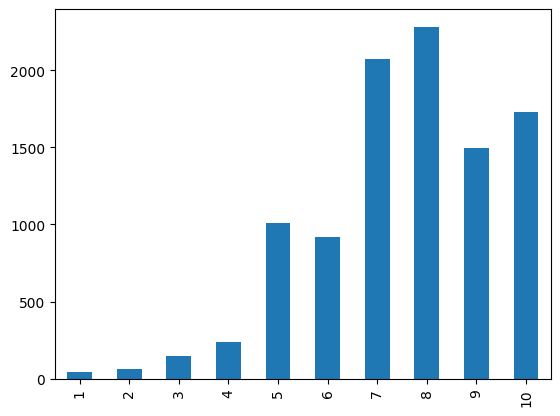

In [18]:
# Plotting the Rating in the barplot
books["Rating"].value_counts().sort_index().plot(kind = "bar")

<Axes: xlabel='Rating', ylabel='Density'>

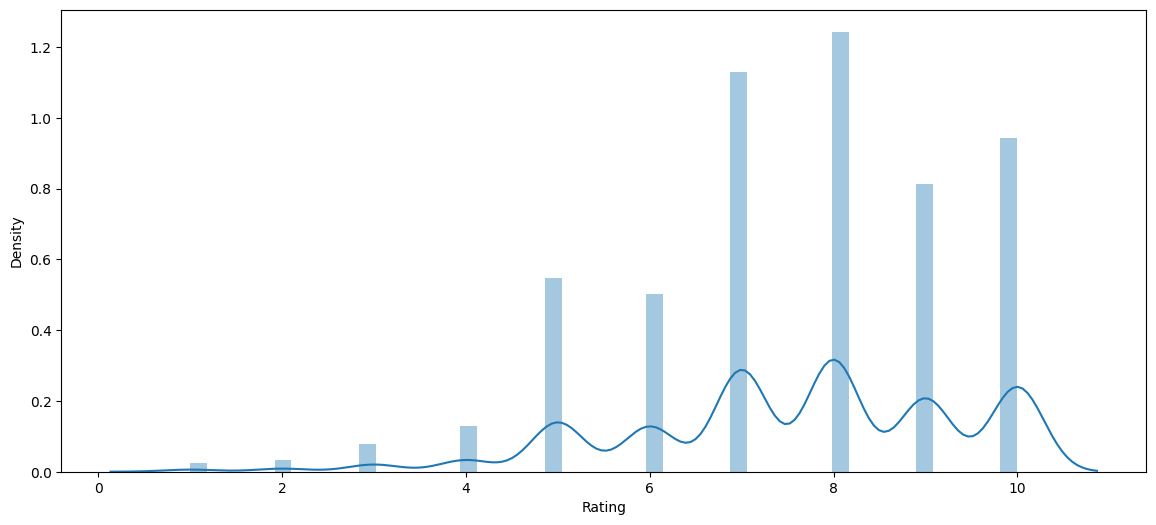

In [21]:
# Distribution plot
plt.figure(figsize = (14,6))
sns.distplot(books["Rating"])

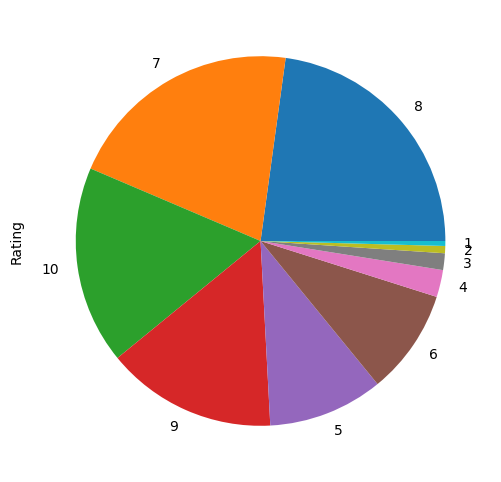

In [29]:
# Pie chart
books['Rating'].value_counts()
books.Rating.value_counts().plot(kind="pie")
plt.show()

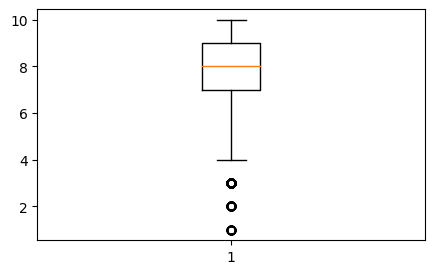

In [34]:
#boxplot
fig=plt.figure(figsize=(5,3))
plt.boxplot(books['Rating'])
plt.show();

In [35]:
# Converting long data into wide data using pivot table
books2 = books.pivot_table(index = "UserId",
                           columns= "Title",
                           values = "Rating")

In [36]:
books2

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [37]:
# Impute those NAaNs with 0 values
books2.fillna(0,inplace = True)
books2

Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
UserId,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [38]:
# Calculating cosine similarity between users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [39]:
user_sim = 1-pairwise_distances(books2.values , metric = "cosine")
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [41]:
# Store the results in a dataframe format
user_sim2 = pd.DataFrame(user_sim)
user_sim2

,0,1,2,3,4,5,6,7,8,9,...,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [42]:
# Set the index and column names to UserId
user_sim2.index = books["UserId"].unique()
user_sim2.columns = books["UserId"].unique()
user_sim2

,276726,276729,276736,276737,276744,276745,276747,276748,276751,276754,...,162085,162091,162092,162095,162103,162107,162109,162113,162121,162129
276726,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
user_sim2.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [44]:
# Nullifying diagonal values
np.fill_diagonal(user_sim,0)
user_sim2.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [45]:
# Most Similar users
user_sim2.idxmax(axis=1)

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [46]:
# extract the books which userId 276813 have watched
id1 = books [ books ["UserId"]== 276813]
id1

,UserId,Title,Rating
45,276813,Icebound,8
46,276813,I'll Be Seeing You,8
47,276813,From the Corner of His Eye,6
48,276813,Isle of Dogs,8
49,276813,Purity in Death,6
50,276813,This Year It Will Be Different: And Other Stories,6
51,276813,Proxies,8


In [47]:
# extract the books which userId 8 have watched
id2 = books[books["UserId"] == 8]
id2

,UserId,Title,Rating
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7


In [48]:
# extract the books which which UserId 276813 & 8 have watched
books[(books["UserId"]==276813) | (books["UserId"]==8)]

,UserId,Title,Rating
45,276813,Icebound,8
46,276813,I'll Be Seeing You,8
47,276813,From the Corner of His Eye,6
48,276813,Isle of Dogs,8
49,276813,Purity in Death,6
50,276813,This Year It Will Be Different: And Other Stories,6
51,276813,Proxies,8
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5


In [49]:
id1.Title

45                                             Icebound
46                                   I'll Be Seeing You
47                           From the Corner of His Eye
48                                         Isle of Dogs
49                                      Purity in Death
50    This Year It Will Be Different: And Other Stories
51                                              Proxies
Name: Title, dtype: object

In [50]:
id2.Title

2400                              Ancient Celtic Romances
2401    The Western way: A practical guide to the West...
2402                                                Wings
2403                                             Truckers
2404                  Keepers of the Earth Teachers Guide
2405                              The Celts Activity Book
2406                                    The Art Of Celtia
Name: Title, dtype: object

In [51]:
# Extract the books which userId 162113 & 276736 have watched
books[(books["UserId"]== 162113) | (books["UserId"]==276736)]

,UserId,Title,Rating
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
9990,162113,The Cape Ann (Contemporary American Fiction),8


In [54]:
# Extract the books which UserId 162113 & 179285 have watched
books[(books["UserId"]==162113)  |  (books["UserId"]==179285)]

,UserId,Title,Rating
9990,162113,The Cape Ann (Contemporary American Fiction),8


In [55]:
pd.merge(id1,id2,on = "Title",how = "outer")

,UserId_x,Title,Rating_x,UserId_y,Rating_y
0,276813.0,Icebound,8.0,NaN,NaN
1,276813.0,I'll Be Seeing You,8.0,NaN,NaN
2,276813.0,From the Corner of His Eye,6.0,NaN,NaN
3,276813.0,Isle of Dogs,8.0,NaN,NaN
4,276813.0,Purity in Death,6.0,NaN,NaN
5,276813.0,This Year It Will Be Different: And Other Stories,6.0,NaN,NaN
6,276813.0,Proxies,8.0,NaN,NaN
7,NaN,Ancient Celtic Romances,NaN,8.0,5.0
8,NaN,The Western way: A practical guide to the West...,NaN,8.0,5.0
9,NaN,Wings,NaN,8.0,5.0


## Considering most similar user

In [56]:
def get_recommendation(customer_id):
        tem = list(user_sim2.sort_values([customer_id],ascending= False).head().index)
        book_list=(books[books["UserId"].isin(tem)]["Title"])
        recommended_books = set(book_list)-set(books[books["UserId"]==customer_id]["Title"])
        return  recommended_books

In [57]:
get_recommendation(162113)

{'A Man of Steel',
 'Bread, Tomato, Garlic: Quick Cooking With 3 Main Ingredients',
 'Cinnamon (Shooting Stars)',
 'Classical Mythology',
 'Groom For Maggie (Whirlwind Weddings) (Silhouette Romance)',
 'Home Song',
 'Spring Fancy',
 'Surrender',
 'Surrender to Love (Avon Historical Romance)',
 "The Ubiquitous Shrimp: From Simple to Exotic, from Feasts to Snacks, All the Wonderful Ways to Savor America's Favorite Seafood"}

In [58]:
get_recommendation(276813)

{'A Man of Steel',
 'Dance the Eagle to Sleep',
 'Groom For Maggie (Whirlwind Weddings) (Silhouette Romance)',
 'The Apprentice',
 'The Dark Druid',
 'The Seventh Night'}